neural_net_estimation.ipynb einfach erstmal kopiert

In [5]:
# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())

Loaded Training features dimensions: (5780, 25)
Loaded Validation features dimensions: (1651, 25)
Loaded Test features dimensions: (827, 25)

Loaded Training labels dimensions: (5780, 1)
Loaded Validation labels dimensions: (1651, 1)
Loaded Test labels dimensions: (827, 1)

First few rows of loaded training features:
   Heimspiel_1  Weihnachtsmarkt_1  Markt_1  Frühling_1.0  Sommer_1.0  \
0            0                  0        0             0           0   
1            0                  1        0             0           0   
2            1                  0        0             0           0   
3            0                  0        1             0           0   
4            0                  1        0             0           0   

   Herbst_1.0  Winter_1.0  Temp_warm_1.0  Temp_cold_1.0  Temp_average_1.0  \
0           0           1              0              0                 1   
1           0           1              0              0                 1   
2           1    

In [6]:
%pip install tensorflow
%pip install numpy --upgrade --ignore-installed
import numpy
from numpy import typing
import tensorflow 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-2.2.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.0 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409 (1.60 KB)

 Trainable params: 359 (1.40 KB)

 Non-trainable params: 50 (200.00 B)

In [7]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20


181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60570.8086 - val_loss: 61420.3672
Epoch 2/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49134.7891 - val_loss: 27413.5254
Epoch 3/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23285.9375 - val_loss: 23389.6758
Epoch 4/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21771.3359 - val_loss: 22446.1191
Epoch 5/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20174.2676 - val_loss: 21758.0625
Epoch 6/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20566.9238 - val_loss: 21387.7773
Epoch 7/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22941.4727 - val_loss: 21096.6445
Epoch 8/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20001.7637 - val_loss: 20881.4297
Epoch 9/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 19328.3828 - val_loss: 20777.1602
Epoch 10/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 19455.9023 - val_loss: 20553.0078
Epoch 11/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 18660.507

In [8]:
model.save("python_model.h5")

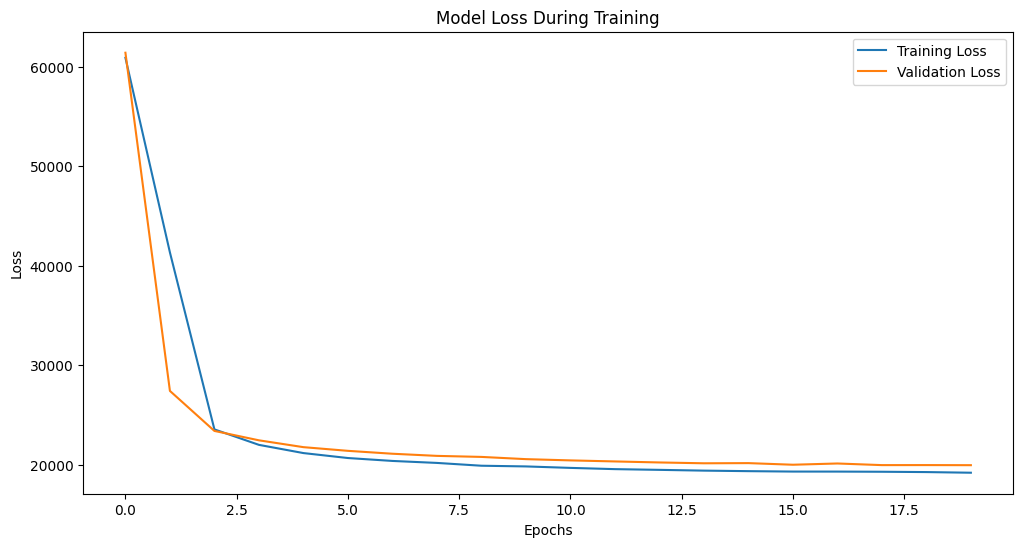

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
MAPE on the Training Data: 76.69%
MAPE on the Validation Data: 77.80%


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


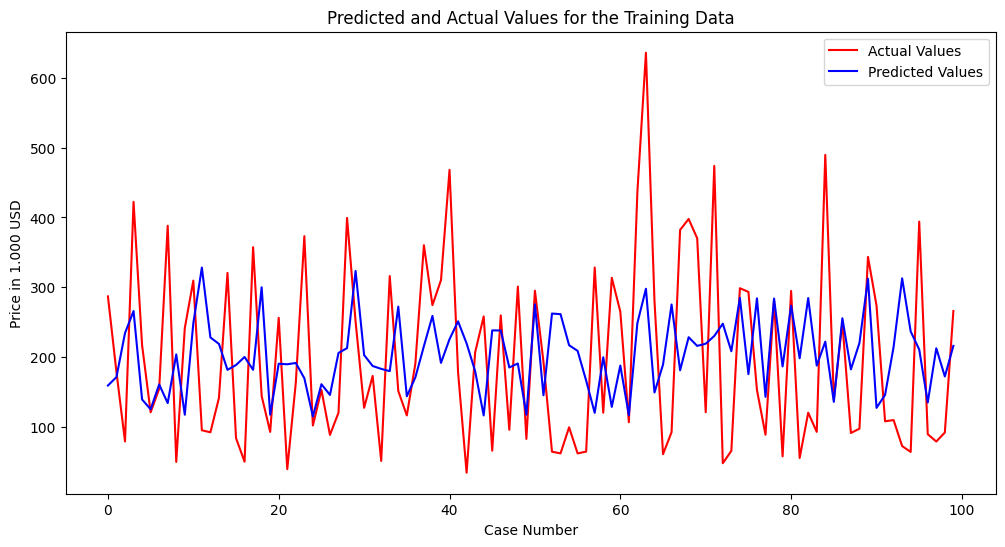

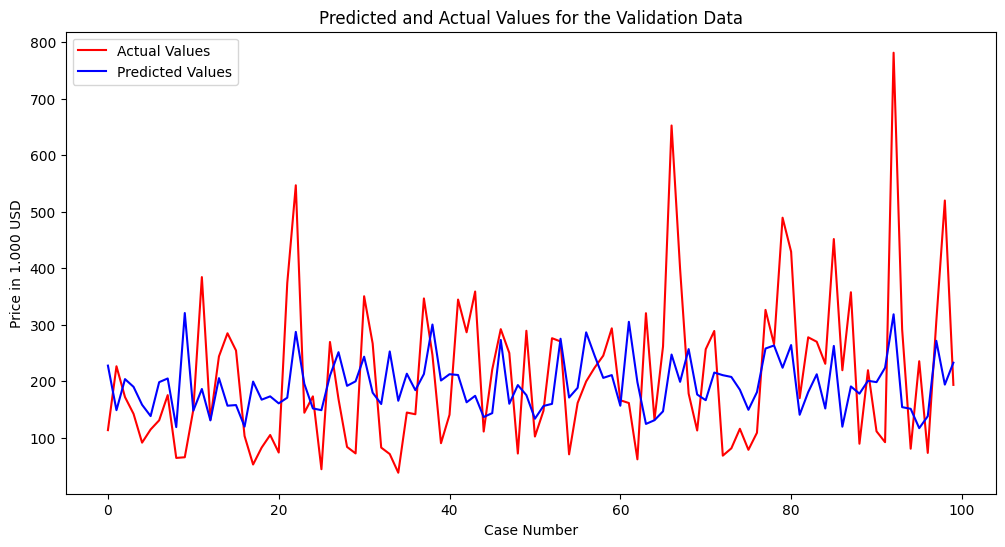

In [11]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')